In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 30)

In [43]:
df = pd.read_csv("data/df_post_EDA.csv", index_col=0)
df.head()

,user_ID,chapter_ID,relative_renewal_date,P,A,L,M,S,RGI,RGO,RRI,RRO,V,1-2-1,TYFCB,CEU,year_of_membership,chapter_size,chapter_retention_rate,chapter_growth_rate,seat_popularity_rate,total_meetings,wont_renew
0,0,31,2016-04-01,33,0,0,1,0,21,7,33,32,1,37,129784,45,0,32,0.315789,1.421053,0.076923,34,0
1,2,18,2017-05-01,33,2,2,0,0,6,17,11,22,1,26,9285,1,0,34,0.718750,1.093750,0.266667,37,0
2,2,18,2018-05-01,35,1,0,0,2,6,24,19,36,1,20,7263,10,1,21,0.424242,0.636364,0.210526,38,0
3,2,18,2019-05-01,36,0,0,0,1,9,8,23,19,3,28,1860,31,2,22,0.739130,1.217391,0.263158,37,0
4,2,18,2020-05-01,33,1,0,0,3,10,13,19,47,4,30,6668,16,3,26,0.760000,1.120000,0.277778,37,0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 2428
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_ID                 2191 non-null   int64  
 1   chapter_ID              2191 non-null   int64  
 2   relative_renewal_date   2191 non-null   object 
 3   P                       2191 non-null   int64  
 4   A                       2191 non-null   int64  
 5   L                       2191 non-null   int64  
 6   M                       2191 non-null   int64  
 7   S                       2191 non-null   int64  
 8   RGI                     2191 non-null   int64  
 9   RGO                     2191 non-null   int64  
 10  RRI                     2191 non-null   int64  
 11  RRO                     2191 non-null   int64  
 12  V                       2191 non-null   int64  
 13  1-2-1                   2191 non-null   int64  
 14  TYFCB                   2191 non-null   

### Drop & split

In [45]:
df.drop(["user_ID", "relative_renewal_date"], axis=1, inplace=True)

# Prepare data
## Feature multiplication

In [46]:
df.columns.tolist()

['chapter_ID',
 'P',
 'A',
 'L',
 'M',
 'S',
 'RGI',
 'RGO',
 'RRI',
 'RRO',
 'V',
 '1-2-1',
 'TYFCB',
 'CEU',
 'year_of_membership',
 'chapter_size',
 'chapter_retention_rate',
 'chapter_growth_rate',
 'seat_popularity_rate',
 'total_meetings',
 'wont_renew']

In [47]:
df["P_by_A"] = df["P"] / (df["A"] + 1)
df["P_by_M"] = df["P"] / (df["M"] + 1)
df["P_by_S"] = df["P"] / (df["S"] + 1)
df["P_by_total"] = df["P"] / df["total_meetings"]
df["A_by_total"] = df["A"] / df["total_meetings"]
df["M_by_total"] = df["M"] / df["total_meetings"]

df["P_tim_retention"] = df["P"] * df["chapter_retention_rate"]
df["P_tim_growth"] = df["P"] * df["chapter_growth_rate"]
df["P_tim_popularity"] = df["P"] * df["seat_popularity_rate"]
df["P_tim_V"] = df["P"] * df["V"]
df["P2_tim_V"] = df["P"]**2 * df["V"]
df["P_tim_TYFCB"] = df["P"] * df["TYFCB"]

df["P2"] = df["P"]**2

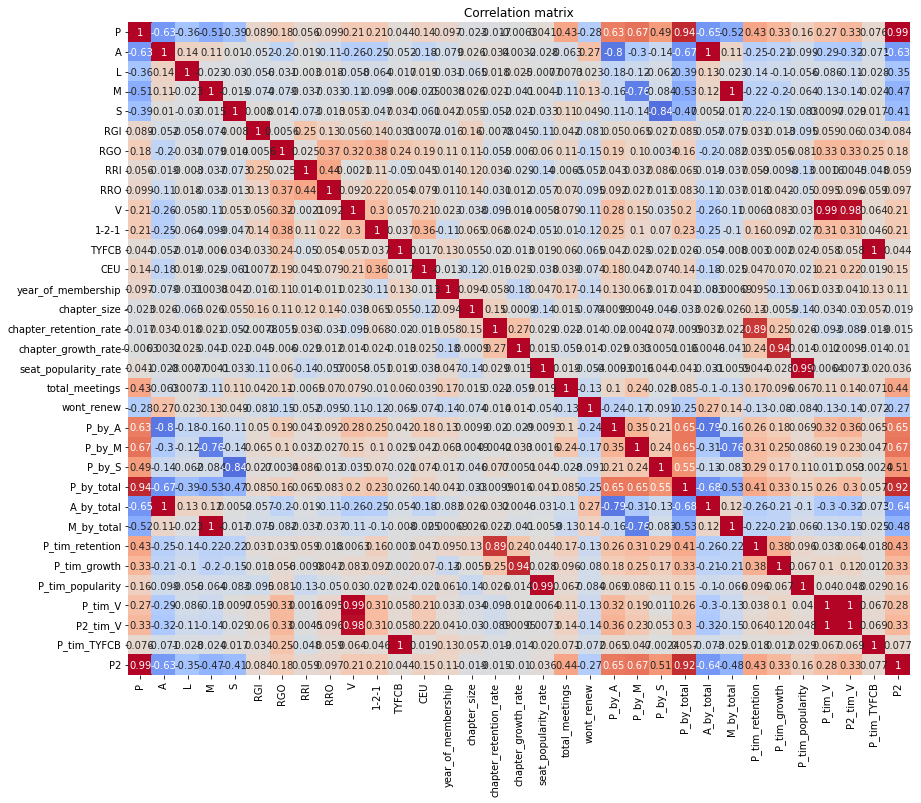

In [48]:
corr = df.iloc[:,1:].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, cbar=False, annot=True, vmin=-1, vmax=1, center=0, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

In [22]:
df.iloc[:,-12:].describe()

,P_by_M,P_by_S,P_by_total,A_by_total,M_by_total,P_tim_retention,P_tim_growth,P_tim_popularity,P_tim_V,P2_tim_V,P_tim_TYFCB,P2
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.00000,2.191000e+03,2191.000000
mean,30.181781,18.607546,0.893038,0.041752,0.012016,21.696327,39.185374,8.717460,133.799635,4576.36011,9.625168e+05,1113.580100
std,8.894305,11.487614,0.087667,0.049992,0.041679,5.266794,12.305222,7.015633,140.490919,4979.39035,2.645777e+06,221.573501
min,0.681818,2.083333,0.378378,0.000000,0.000000,2.956522,13.575758,0.000000,0.000000,0.00000,0.000000e+00,196.000000
25%,30.000000,8.750000,0.852941,0.000000,0.000000,18.422648,31.968750,2.784615,34.000000,1156.00000,1.772245e+05,961.000000
50%,34.000000,16.000000,0.916667,0.027027,0.000000,21.863636,37.000000,6.705882,99.000000,3136.00000,4.109880e+05,1156.000000
75%,36.000000,32.000000,0.948718,0.055556,0.000000,25.057453,43.071795,13.052632,185.000000,6286.00000,9.354495e+05,1296.000000
max,40.000000,40.000000,1.000000,0.594595,0.567568,40.000000,108.571429,36.000000,1260.000000,45360.00000,4.877789e+07,1600.000000


In [23]:
from imblearn.under_sampling import EditedNearestNeighbours, TomekLinks, NeighbourhoodCleaningRule
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

In [24]:
X = df.drop(["wont_renew", "chapter_ID"], axis=1).copy()
y = df["wont_renew"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=710)

print("Original dataset shape: %s" %Counter(y_train))

Original dataset shape: Counter({0: 1215, 1: 537})


In [25]:
under_sampler = TomekLinks()
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)
print("Downsampled dataset shape: %s" %Counter(y_resampled))

Downsampled dataset shape: Counter({0: 1000, 1: 537})


In [26]:
scaler = StandardScaler()
scaler.fit(X_resampled)
X_resampled = pd.DataFrame(scaler.transform(X_resampled), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [27]:
X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1537 entries, 0 to 1536
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   P                       1537 non-null   float64
 1   A                       1537 non-null   float64
 2   L                       1537 non-null   float64
 3   M                       1537 non-null   float64
 4   S                       1537 non-null   float64
 5   RGI                     1537 non-null   float64
 6   RGO                     1537 non-null   float64
 7   RRI                     1537 non-null   float64
 8   RRO                     1537 non-null   float64
 9   V                       1537 non-null   float64
 10  1-2-1                   1537 non-null   float64
 11  TYFCB                   1537 non-null   float64
 12  CEU                     1537 non-null   float64
 13  year_of_membership      1537 non-null   float64
 14  chapter_size            1537 non-null   

# Model

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier, Pool
import xgboost as xgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [29]:
df_scores = pd.DataFrame(columns=["training_time [s]", "accuracy", "precision", "recall", "f1", "auc"])

## 1. Logistic Regression

In [30]:
logreg = LogisticRegression(max_iter=2000)

start = time.time()
logreg.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start):.2f} seconds")

y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)

df_scores.loc["logistic_regression"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]
df_scores

Elapsed time: 0.02 seconds


,training_time [s],accuracy,precision,recall,f1,auc
logistic_regression,0.02,0.728929,0.588889,0.392593,0.471111,0.702802


## 2. K-neighbors classifier

In [31]:
knn = KNeighborsClassifier()

start = time.time()
knn.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start) // 60:.0f} minutes {(end - start):.2f} seconds")

y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

df_scores.loc["knn"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0 minutes 0.00 seconds


## 3. Decision Tree

In [32]:
dt = DecisionTreeClassifier()

start = time.time()
dt.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start) // 60:.0f} minutes {(end - start):.2f} seconds")

y_pred = dt.predict(X_test)
y_proba = dt.predict_proba(X_test)

df_scores.loc["decision_tree"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0 minutes 0.02 seconds


## 4. Random Forest

In [33]:
rf = RandomForestClassifier()

start = time.time()
rf.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start) // 60:.0f} minutes {(end - start):.2f} seconds")

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

df_scores.loc["random_forest"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0 minutes 0.34 seconds


## 5. AdaBoost

In [34]:
ada = AdaBoostClassifier()

start = time.time()
ada.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start) // 60:.0f} minutes {(end - start):.2f} seconds")

y_pred = ada.predict(X_test)
y_proba = ada.predict_proba(X_test)

df_scores.loc["AdaBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0 minutes 0.16 seconds


## 6. XGBoost

In [35]:
xg = xgb.XGBClassifier(objective='binary:logistic', eval_metric="auc", use_label_encoder=False)

start = time.time()
xg.fit(X_resampled, y_resampled)
end = time.time()
print(f"Elapsed time: {(end - start) // 60:.0f} minutes {(end - start):.2f} seconds")

y_pred = xg.predict(X_test)
y_proba = xg.predict_proba(X_test)

df_scores.loc["XGBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Elapsed time: 0 minutes 0.13 seconds


## 7. CatBoost

In [38]:
X = df.drop(["wont_renew"], axis=1).copy()
y = df["wont_renew"].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=710)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train["chapter_ID"] = X_train["chapter_ID"].astype("str")
X_test["chapter_ID"] = X_test["chapter_ID"].astype("str")

cb = CatBoostClassifier()

start = time.time()
cb.fit(X_train, y_train, verbose=200, cat_features=["chapter_ID"])
end = time.time()
print(f"Elapsed time: minutes {(end - start):.2f} seconds")

y_pred = cb.predict(X_test)
y_proba = cb.predict_proba(X_test)

df_scores.loc["CatBoost"] = [round(end - start, 2),
                                        accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred),
                                        f1_score(y_test, y_pred),
                                        roc_auc_score(y_test, y_proba[:,1])]

Learning rate set to 0.01309
0:	learn: 0.6895151	total: 23.1ms	remaining: 23s
200:	learn: 0.4904023	total: 6.21s	remaining: 24.7s
400:	learn: 0.4329577	total: 12.1s	remaining: 18.1s
600:	learn: 0.3895579	total: 18.2s	remaining: 12.1s
800:	learn: 0.3437823	total: 25s	remaining: 6.21s
999:	learn: 0.3034297	total: 31.2s	remaining: 0us
Elapsed time: minutes 31.31 seconds


## Compare results

In [39]:
df_scores.sort_values("auc", ascending=False)

,training_time [s],accuracy,precision,recall,f1,auc
CatBoost,31.31,0.726651,0.622951,0.281481,0.387755,0.714912
random_forest,0.34,0.715262,0.562500,0.333333,0.418605,0.703192
logistic_regression,0.02,0.728929,0.588889,0.392593,0.471111,0.702802
AdaBoost,0.16,0.710706,0.538462,0.414815,0.468619,0.688584
XGBoost,0.13,0.712984,0.539823,0.451852,0.491935,0.682846
knn,0.00,0.656036,0.424528,0.333333,0.373444,0.632334
decision_tree,0.02,0.603645,0.392265,0.525926,0.449367,0.582042


In [46]:
df_scores.to_csv("model_scores_step3.csv")